In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
train_data = pd.read_csv('credit_risk_train.csv')
test_data = pd.read_csv('credit_risk_test.csv')

In [18]:
train_data.head()

,BILL_1,BILL_2,BILL_3,BILL_4,BILL_5,BILL_6,AGE,SEX,EDUCATION,MARRIAGE,RISK
0,0,0,0,0,0,0,37,Female,Graduate School,Married,LOW
1,8525,5141,5239,7911,17890,10000,25,Male,High School,Single,HIGH
2,628,662,596,630,664,598,39,Male,Graduate School,Married,HIGH
3,4649,3964,3281,934,467,12871,41,Female,Graduate School,Single,HIGH
4,46300,10849,8857,9658,9359,9554,55,Female,High School,Married,HIGH


In [19]:
test_data.head()

,BILL_1,BILL_2,BILL_3,BILL_4,BILL_5,BILL_6,AGE,SEX,EDUCATION,MARRIAGE
0,164082,157663,159094,132809,100693,97181,30,Female,University,Married
1,33457,34197,35641,36742,38127,39509,36,Male,University,Single
2,0,742,0,0,596,4870,53,Female,Graduate School,Single
3,712,712,862,862,862,862,53,Male,High School,Married
4,13107,13740,14770,13306,10465,9704,23,Female,University,Single


In [35]:
combine = [train_data, test_data]        

In [36]:
title_mapping = {'Male':0 , 'Female':1}

for dataset in combine:
    dataset['SEX'] = dataset['SEX'].map(title_mapping)
train_data.head()

,BILL_1,BILL_2,BILL_3,BILL_4,BILL_5,BILL_6,AGE,SEX,EDUCATION,MARRIAGE,RISK
0,0,0,0,0,0,0,37,1,Graduate School,Married,LOW
1,8525,5141,5239,7911,17890,10000,25,0,High School,Single,HIGH
2,628,662,596,630,664,598,39,0,Graduate School,Married,HIGH
3,4649,3964,3281,934,467,12871,41,1,Graduate School,Single,HIGH
4,46300,10849,8857,9658,9359,9554,55,1,High School,Married,HIGH


In [37]:
title_mapping = {'Graduate School':1 , 'University':2 , 'High School':3 , 'Others':4}
for dataset in combine:
    dataset['EDUCATION'] = dataset['EDUCATION'].map(title_mapping)
train_data.head()

,BILL_1,BILL_2,BILL_3,BILL_4,BILL_5,BILL_6,AGE,SEX,EDUCATION,MARRIAGE,RISK
0,0,0,0,0,0,0,37,1,1,Married,LOW
1,8525,5141,5239,7911,17890,10000,25,0,3,Single,HIGH
2,628,662,596,630,664,598,39,0,1,Married,HIGH
3,4649,3964,3281,934,467,12871,41,1,1,Single,HIGH
4,46300,10849,8857,9658,9359,9554,55,1,3,Married,HIGH


In [38]:
title_mapping={'Married': 1, 'Single': 2, 'Others': 3}
for dataset in combine:
    dataset['MARRIAGE'] = dataset['MARRIAGE'].map(title_mapping)
train_data.head()

,BILL_1,BILL_2,BILL_3,BILL_4,BILL_5,BILL_6,AGE,SEX,EDUCATION,MARRIAGE,RISK
0,0,0,0,0,0,0,37,1,1,1,LOW
1,8525,5141,5239,7911,17890,10000,25,0,3,2,HIGH
2,628,662,596,630,664,598,39,0,1,1,HIGH
3,4649,3964,3281,934,467,12871,41,1,1,2,HIGH
4,46300,10849,8857,9658,9359,9554,55,1,3,1,HIGH


In [39]:
title_mapping = {'LOW':0, 'HIGH': 1}
train_data['RISK'] = train_data['RISK'].map(title_mapping)
train_data.head()

,BILL_1,BILL_2,BILL_3,BILL_4,BILL_5,BILL_6,AGE,SEX,EDUCATION,MARRIAGE,RISK
0,0,0,0,0,0,0,37,1,1,1,0
1,8525,5141,5239,7911,17890,10000,25,0,3,2,1
2,628,662,596,630,664,598,39,0,1,1,1
3,4649,3964,3281,934,467,12871,41,1,1,2,1
4,46300,10849,8857,9658,9359,9554,55,1,3,1,1


In [33]:
for dataset in combine:
    dataset.loc[dataset['AGE'] <= 16, 'AGE'] = 0
    dataset.loc[(dataset['AGE'] > 16) & (dataset['AGE'] <= 32),'AGE']=1
    dataset.loc[(dataset['AGE'] > 32) & (dataset['AGE'] <= 48),'AGE']=2
    dataset.loc[(dataset['AGE'] > 48) & (dataset['AGE'] <= 64),'AGE']=3
    dataset.loc[dataset['AGE'] >  64, 'AGE']=4
train_data.tail()

,BILL_1,BILL_2,BILL_3,BILL_4,BILL_5,BILL_6,AGE,SEX,EDUCATION,MARRIAGE,RISK
19995,64494,69272,62196,62809,48047,49110,0,0,3,2,0
19996,66505,67514,69038,69927,50579,49483,0,1,2,2,0
19997,0,0,0,0,0,0,0,1,1,2,1
19998,52180,51009,49025,38697,18561,18952,0,1,2,1,1
19999,135215,137863,130622,126063,118836,116865,0,0,3,1,0


In [40]:
from sklearn.model_selection import train_test_split
X_all = train_data.drop("RISK", axis=1)
Y_all = train_data["RISK"]
num_test = 0.2

X_train, X_test,Y_train, Y_test = train_test_split(X_all,Y_all,test_size=num_test) 
X_train.shape,Y_train.shape

((16000, 10), (16000,))

In [50]:
GBDT = GradientBoostingClassifier(n_estimators = 200,learning_rate = 0.1)

GBDT.fit(X_train, Y_train)

Y_pred = GBDT.predict(test_data)
# random_forest.score(X_test, Y_test)
acc_GBDT = round(GBDT.score(X_test, Y_test) * 100, 2)
acc_GBDT

77.5

(0.7760150710009327, 0.008326607813117226)

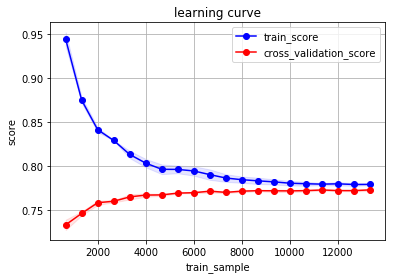

In [51]:
from sklearn.model_selection import GridSearchCV,learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"train_sample")
        plt.ylabel(u"score")
#         plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"train_score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"cross_validation_score")

        plt.legend(loc="best")

#         plt.draw()
#         plt.show()
#         plt.gca().invert_yaxis()
#         plt.savefig("learn_curve.png") 

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff
train_sizes, train_scores, test_scores=learning_curve(GradientBoostingClassifier(n_estimators = 200,learning_rate = 0.1),X_all,Y_all,cv=5)

plot_learning_curve(GradientBoostingClassifier(n_estimators = 200,learning_rate = 0.1), u"learning curve", X_all, Y_all)

In [59]:
submission = pd.DataFrame({
        "RISK": Y_pred
    })

In [60]:
title_mapping = {0:'LOW', 1:'HIGH'}
submission['RISK'] = submission['RISK'].map(title_mapping)

In [ ]:
submission.to_csv('submission', index= False)